In [1]:
import sys, os
sys.path.append('./modules')
from Monitoring_Tools import *
from OpenStack_Tools  import *

In [2]:
# TODO:
# ssh WRCO0 df -h / /opt/platform /etc/nova/instances
# Add new computes, add keys

In [3]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [4]:
platform=os.getenv('OS_PLATFORM', 'poc2')
display_platform(platform)
inventory = read_inventory("$HOME/env/{}_hosts.ini".format(platform))
conn = connectToCloud(platform)
#inventory

In [5]:
HTML_URL = show_notebook_url(platform, host_ip="10.3.216.210", port=8888)

#### Servers status (ping servers in 'ping_check' group)

In [6]:
display_html_ping_all(inventory, False)

ping(hlm1[10.3.216.10]) ... ping(hlm1vm[10.3.219.30]) ... ping(hos1[10.3.219.31]) ... ping(hos2[10.3.219.32]) ... ping(hos3[10.3.219.33]) ... ping(hos_vip[10.3.216.30]) ... ping(wrcl1[10.3.219.131]) ... ping(wrcl2[10.3.219.132]) ... ping(wrcl_vip[10.3.219.130]) ... ping(wrco0[10.3.219.177]) ... ping(wrco1[10.3.219.178]) ... ping(wrco2[10.3.219.179]) ... ping(wrco3[10.3.219.134]) ... ping(wrco4[10.3.219.135]) ... ping(wrco5[10.3.219.135]) ... ping(wrco6[10.3.219.137]) ... ping(wrco7[10.3.219.138]) ... 

hlm1[10.3.216.10],OK: 0.155 msec
hlm1vm[10.3.219.30],OK: 0.309 msec
hos1[10.3.219.31],OK: 0.242 msec
hos2[10.3.219.32],OK: 0.225 msec
hos3[10.3.219.33],OK: 0.173 msec
hos_vip[10.3.216.30],OK: 0.282 msec
wrcl1[10.3.219.131],OK: 0.176 msec
wrcl2[10.3.219.132],OK: 0.136 msec
wrcl_vip[10.3.219.130],OK: 0.130 msec
wrco0[10.3.219.177],OK: 0.113 msec
wrco1[10.3.219.178],OK: 0.088 msec


#### Show VMs (servers)

In [7]:
showServerList( conn )

2 flavors
11 images
0 servers


name,status,flavor,image,addresses


#### Show server port status

In [8]:
display_html_ping_ports_all(inventory)

ping(hlm1[10.3.216.10:22]) ... ping(hlm1vm[10.3.219.30:22]) ... ping(hos1[10.3.219.31:22]) ... ping(hos2[10.3.219.32:22]) ... ping(hos3[10.3.219.33:22]) ... ping(hos_vip[10.3.216.30:22]) ... ping(wrcl1[10.3.219.131:22]) ... ping(wrcl2[10.3.219.132:22]) ... ping(wrcl_vip[10.3.219.130:22]) ... ping(wrco0[10.3.219.177:22]) ... ping(wrco1[10.3.219.178:22]) ... ping(wrco2[10.3.219.179:22]) ... ping(wrco3[10.3.219.134:22]) ... ping(wrco4[10.3.219.135:22]) ... ping(wrco5[10.3.219.135:22]) ... ping(wrco6[10.3.219.137:22]) ... ping(wrco7[10.3.219.138:22]) ... 

hlm1[10.3.216.10:22],OK
hlm1vm[10.3.219.30:22],OK
hos1[10.3.219.31:22],OK
hos2[10.3.219.32:22],OK
hos3[10.3.219.33:22],OK
hos_vip[10.3.216.30:22],OK
wrcl1[10.3.219.131:22],OK
wrcl2[10.3.219.132:22],OK
wrcl_vip[10.3.219.130:22],OK
wrco0[10.3.219.177:22],OK
wrco1[10.3.219.178:22],OK


#### Show Endpoint URLs status (check ports open)

In [9]:
display_html_endpoint_urls(conn)

10.3.216.130:8774 [compute],OK
10.3.216.130:9696 [network],OK
10.3.216.30:5000 [identity],OK
10.3.216.30:8776 [volume],OK
10.3.216.30:9292 [image],OK


In [10]:
for host in sorted(inventory['ssh_check']):    
    ip = inventory['hosts'][host]['ansible_host']
    user = inventory['hosts'][host]['ansible_user']
    pkey = inventory['hosts'][host]['ssh_key']
    
    stdout, stderr = ssh_command(ip, user, pkey, "uptime")
    
    #print("LINE=" + stdout)
    uptime = strip_uptime(stdout)
    print(host + ":" + uptime)

hlm1:102 days, 20:32
hlm1vm:101 days, 11:52
hos1:88 days, 14:56
hos2:88 days, 14:56
hos3:32 days, 17:08
hos_vip:88 days, 14:56
wrcl1:51 days, 15:30
wrcl2:60 days, 21:31
wrcl_vip:60 days, 21:31
wrco0:60 days, 18:57
wrco1:50 days, 15:00
wrco2:50 days, 18:15
wrco3:50 days, 18:11
wrco4:16 days, 15:07
wrco5:16 days, 15:07
wrco6:14 days, 10:46
wrco7:14 days, 10:46


In [11]:
! [ ! -d history ] && mkdir history

import datetime
import time

#d = datetime.date.today().strftime("%B %d, %Y")
#dt = datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
d = datetime.date.today().strftime("%Y-%m-%d")
dt = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M")
print(d)
print(dt)

2016-07-03
2016-07-03_08:50


In [13]:
for host in sorted(inventory['df_check']):    
    ip = inventory['hosts'][host]['ansible_host']
    user = inventory['hosts'][host]['ansible_user']
    pkey = inventory['hosts'][host]['ssh_key']
    df_check = inventory['hosts'][host]['df_check']
    
    # write to history subdir (~/notebooks/cron for cron jobs)
    history_file='history/df_history_' + platform + '_' + host + '.txt'
    history_fd = open(history_file, 'a')
    
    full_df_cmd="df 2>&1"
    df_op, stderr = ssh_command(ip, user, pkey, full_df_cmd)    
    history_fd.write('DATE:' + dt + '\n' + df_op)
    
    df_cmd="df " + df_check.replace(",", " ") + "| grep -v ^Filesystem"
    df_op, stderr = ssh_command(ip, user, pkey, df_cmd)    
    #df_op = stdout.decode('utf8')
    #print("HOST[" + host + "]<" + df_check + ">{" + df_cmd +"}:" + df_op)
    
    df_lines=df_op.split("\n")
    for df_line in df_lines:
        #print("LINE: " + df_line)
        pc_pos = df_line.find("%")
        if pc_pos != -1:
            pc=int(df_line[pc_pos-3:pc_pos])
            partn=df_line[pc_pos+1:]
            print(host + " " + str(pc) + "% " + partn)

hlm1 21%  /
hlm1vm 4%  /
hos1 51%  /
hos2 50%  /
hos3 48%  /
wrcl1 23%  /
wrcl1 1%  /scratch
wrcl1 11%  /var/log
wrcl1 1%  /opt/backups
wrcl1 23%  /
wrcl1 23%  /
wrcl1 23%  /
wrcl1 23%  /
wrcl2 22%  /
wrcl2 4%  /scratch
wrcl2 11%  /var/log
wrcl2 1%  /opt/backups
wrcl2 1%  /var/lib/rabbitmq
wrcl2 4%  /var/lib/postgresql
wrcl2 25%  /opt/cgcs
wrcl2 1%  /opt/platform
wrco0 11%  /
wrco0 3%  /var/log
wrco0 1%  /scratch
wrco0 1%  /local_pv
wrco0 25%  /etc/nova/instances
wrco0 1%  /opt/platform
wrco1 11%  /
wrco1 3%  /var/log
wrco1 1%  /scratch
wrco1 1%  /local_pv
wrco1 25%  /etc/nova/instances
wrco1 1%  /opt/platform
wrco2 11%  /
wrco2 4%  /var/log
wrco2 1%  /scratch
wrco2 1%  /local_pv
wrco2 25%  /etc/nova/instances
wrco2 1%  /opt/platform
wrco3 11%  /
wrco3 3%  /var/log
wrco3 1%  /scratch
wrco3 1%  /local_pv
wrco3 25%  /etc/nova/instances
wrco3 1%  /opt/platform
wrco4 11%  /
wrco4 2%  /var/log
wrco4 1%  /scratch
wrco4 1%  /local_pv
wrco4 25%  /etc/nova/instances
wrco4 1%  /opt/platform
wrco

In [14]:
# TODO: 
# equivalent of openstack service list

# See: how service list is implemented:
#    https://github.com/openstack/python-openstackclient/blob/master/openstackclient/compute/v2/service.py
# (compute_client = client_manager.compute)
#
# See also: how to create/use a clientmanager:
#    https://github.com/openstack/python-openstackclient/blob/master/examples/osc-lib.py

#from openstackclient.common import clientmanager
#from openstackclient.common import utils

#### Although graphics will not be included in the e-mail, they are included in the nbconvert generated html

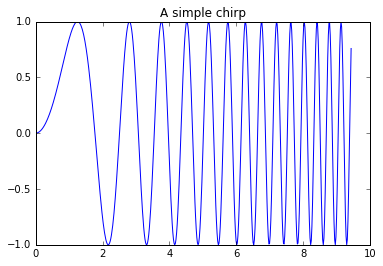

In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

In [16]:
from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np

#### Similarly other graphics generated through SVG, CSS are displayed in the nbconvert generated html

In [17]:
%%html

<style>
     .pieContainer {
          height: 260px;
          position: relative;
     }
     .pieBackground {
          background-color: lightgrey;
          position: relative;
          width: 180px;
          height: 180px;
          -moz-border-radius: 90px;
          -webkit-border-radius: 90px;
          -o-border-radius: 90px;
          border-radius: 90px;
          -moz-box-shadow: -1px 1px 3px #000;
          -webkit-box-shadow: -1px 1px 3px #000;
          -o-box-shadow: -1px 1px 3px #000;
          box-shadow: -1px 1px 3px #000;
     } 
     .pie {
          position: absolute;
          width: 180px;
          height: 180px;
          -moz-border-radius: 90px;
          -webkit-border-radius: 90px;
          -o-border-radius: 90px;
          border-radius: 90px;
          clip: rect(0px, 90px, 180px, 0px);
     }
     .hold {
          position: absolute;
          width: 180px;
          height: 180px;
          -moz-border-radius: 90px;
          -webkit-border-radius: 90px;
          -o-border-radius: 90px;
          border-radius: 90px;
          clip: rect(0px, 180px, 180px, 90px);
     }
     #pieSliceX10 .pie {
          background-color: #1b458b;
          -webkit-transform:rotate(10deg);
          -moz-transform:rotate(10deg);
          -o-transform:rotate(10deg);
          transform:rotate(10deg);
     }
</style>

<div class="pieContainer">
     <h3>Disk usage</h3><p/>
     <div class="pieBackground"> <div id="pieSliceX10" class="hold"><div class="pie"></div></div></div>
    
</div>

In [18]:
%%html


<!-- ADAPTED from https://codepen.io/AtomicNoggin/pen/fEish -->
    
<div class="pieContainer2">
  <div class="pie2" data-start="0" data-value="30"></div>
  <div class="pie2 highlight" data-start="30" data-value="30"></div>
  <div class="pie2" data-start="60" data-value="40"></div>
  <div class="pie2 big" data-start="100" data-value="260"></div>
</div>

<style>
     .pieContainer2 {
          height: 260px;
          position: relative;
     }

.pie2 {
		position:absolute;
		width:100px;
		height:200px;
		overflow:hidden;
		left:150px;
		-moz-transform-origin:left center;
		-ms-transform-origin:left center;
		-o-transform-origin:left center;
		-webkit-transform-origin:left center;
		transform-origin:left center;
	}
/*
  unless the piece represents more than 50% of the whole chart.
  then make it a square, and ensure the transform origin is
  back in the center.

  NOTE: since this is only ever a single piece, you could
  move this to a piece specific rule and remove the extra class
*/
	.pie2.big {
		width:200px;
		height:200px;
		left:50px;
		-moz-transform-origin:center center;
		-ms-transform-origin:center center;
		-o-transform-origin:center center;
		-webkit-transform-origin:center center;
		transform-origin:center center;
	}
/*
  this is the actual visible part of the pie. 
  Give it the same dimensions as the regular piece.
  Use border radius make it a half circle.
  move transform origin to the middle of the right side.
  Push it out to the left of the containing box.
*/
	.pie2:BEFORE {
		content:"";
		position:absolute;
		width:100px;
		height:200px;
		left:-100px;
		border-radius:100px 0 0 100px;
		-moz-transform-origin:right center;
		-ms-transform-origin:right center;
		-o-transform-origin:right center;
		-webkit-transform-origin:right center;
		transform-origin:right center;
		
	}
 /* if it's part of a big piece, bring it back into the square */
	.pie2.big:BEFORE {
		left:0px;
	}
/* 
  big pieces will also need a second semicircle, pointed in the
  opposite direction to hide the first part behind.
*/
	.pie2.big:AFTER {
		content:"";
		position:absolute;
		width:100px;
		height:200px;
		left:100px;
		border-radius:0 100px 100px 0;
	}
/*
  add colour to each piece.
*/
	.pie2:nth-of-type(1):BEFORE,
	.pie2:nth-of-type(1):AFTER {
		background-color:blue;	
	}
	.pie2:nth-of-type(2):AFTER,
	.pie2:nth-of-type(2):BEFORE {
		background-color:green;	
	}
	.pie2:nth-of-type(3):AFTER,
	.pie2:nth-of-type(3):BEFORE {
		background-color:red;	
	}
	.pie2:nth-of-type(4):AFTER,
	.pie2:nth-of-type(4):BEFORE {
		background-color:orange;	
	}
/*
  now rotate each piece based on their cumulative starting
  position
*/
	.pie2[data-start="30"] {
		-moz-transform: rotate(30deg); /* Firefox */
		-ms-transform: rotate(30deg); /* IE */
		-webkit-transform: rotate(30deg); /* Safari and Chrome */
		-o-transform: rotate(30deg); /* Opera */
		transform:rotate(30deg);
	}
	.pie2[data-start="60"] {
		-moz-transform: rotate(60deg); /* Firefox */
		-ms-transform: rotate(60deg); /* IE */
		-webkit-transform: rotate(60deg); /* Safari and Chrome */
		-o-transform: rotate(60deg); /* Opera */
		transform:rotate(60deg);
	}
	.pie2[data-start="100"] {
		-moz-transform: rotate(100deg); /* Firefox */
		-ms-transform: rotate(100deg); /* IE */
		-webkit-transform: rotate(100deg); /* Safari and Chrome */
		-o-transform: rotate(100deg); /* Opera */
		transform:rotate(100deg);
	}
/*
  and rotate the amount of the pie that's showing.

  NOTE: add an extra degree to all but the final piece, 
  to fill in unsightly gaps.
*/
	.pie2[data-value="30"]:BEFORE {
		-moz-transform: rotate(31deg); /* Firefox */
		-ms-transform: rotate(31deg); /* IE */
		-webkit-transform: rotate(31deg); /* Safari and Chrome */
		-o-transform: rotate(31deg); /* Opera */
		transform:rotate(31deg);
	}
	.pie2[data-value="40"]:BEFORE {
		-moz-transform: rotate(41deg); /* Firefox */
		-ms-transform: rotate(41deg); /* IE */
		-webkit-transform: rotate(41deg); /* Safari and Chrome */
		-o-transform: rotate(41deg); /* Opera */
		transform:rotate(41deg);
	}
	.pie2[data-value="260"]:BEFORE {
		-moz-transform: rotate(260deg); /* Firefox */
		-ms-transform: rotate(260deg); /* IE */
		-webkit-transform: rotate(260deg); /* Safari and Chrome */
		-o-transform: rotate(260deg); /* Opera */
		transform:rotate(260deg);
	}

</style> 